In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration des données

In [2]:
Customer_churn=pd.read_csv('customer_churn')
Customer_churn

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Notre base de donnée est composé d'un tableau de 440 833 lignes et 12 colonnes 
Nous avons un jeu de données qui contient des informations sur 440833 clients. 
Chaque ligne représente un client avec divers attributs tels que l'âge, le sexe, la durée d'abonnement,
la fréquence d'utilisation, les appels au support, les retards de paiement, le type d'abonnement,
la durée du contrat, les dépenses totales, la dernière interaction et l'état de résiliation (churn).

- 1- CustomerID : Identifiant unique pour chaque client.
- 2- Age : Âge du client.
- 3- Gender : Sexe du client.
- 4- Tenure : Durée de l'abonnement en mois.
- 5- Usage Frequency : Fréquence d'utilisation du service.
- 6- Support Calls : Nombre d'appels au support technique.
- 7- Payment Delay : Nombre de jours de retard de paiement.
- 8- Subscription Type : Type d'abonnement (Standard, Basic, Premium).
- 9- Contract Length : Durée du contrat (Mensuel, Trimestriel, Annuel).
- 10- Total Spend : Dépense totale du client.
- 11- Last Interaction : Dernière interaction du client avec le service.
- 12- Churn : Indicateur de résiliation (1 si le client a résilié, 0 sinon).

In [3]:
# Afficher les informations générales du DF
print(Customer_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


Le DataFrame contient 440833 entrées et 12 colonnes, sans valeurs manquantes. Les types de données incluent principalement des float64 et des objets. La colonne "Churn" permet de distinguer les clients ayant résilié leur abonnement, ce qui est crucial pour l'analyse du taux de résiliation.

In [4]:
# Statistiques descriptives
Statistiques=Customer_churn.describe()
Statistiques

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Le DataFrame contient des informations sur 440832 clients avec une moyenne d'âge de 39 ans et une durée d'abonnement moyenne de 31 mois. Les clients ont en moyenne 3,6 appels au support, un retard de paiement moyen de 13 jours, et dépensent en moyenne 631,62 unités monétaires. Le taux de résiliation (churn) est de 56,71%, indiquant qu'une majorité de clients ont résilié leur abonnement.

In [5]:
#Vérification des doublons
doublons = Customer_churn[Customer_churn.duplicated()]
print(f"Nombre de doublons (toutes les colonnes) : {doublons.shape[0]}")
if doublons.shape[0] > 0:
    print("Lignes dupliquées (toutes les colonnes) :")
    print(doublons)

Nombre de doublons (toutes les colonnes) : 0


Le résultat indique qu'il n'y a aucune ligne dupliquée, ce qui signifie que chaque entrée du DataFrame est unique. Cela garantit l'intégrité des données pour des analyses ultérieures sans nécessiter de nettoyage supplémentaire pour les doublons.

In [6]:
#Vérification des valeurs manquantes
Valeurs_manquantes=Customer_churn.isnull().sum().sum()
print(Valeurs_manquantes)

12


Il y a 12 valeurs manquantes dans l'ensemble des données. Cela signifie qu'il faut traiter ces valeurs manquantes avant d'analyser ou de modéliser les données.

In [7]:
# Remplacement des valeurs manquantes par la médiane pour les colonnes numériques
Customer_churn.fillna(Customer_churn.median(numeric_only=True), inplace=True)

# Remplacement des valeurs manquantes pour les colonnes catégorielles par une valeur spécifique
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
Customer_churn[categorical_columns] = Customer_churn[categorical_columns].fillna('Unknown')

# Vérification après traitement
print(Customer_churn.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


La vérification après traitement montre qu'il n'y a plus de valeurs manquantes dans le DataFrame, toutes ayant été traitées correctement.

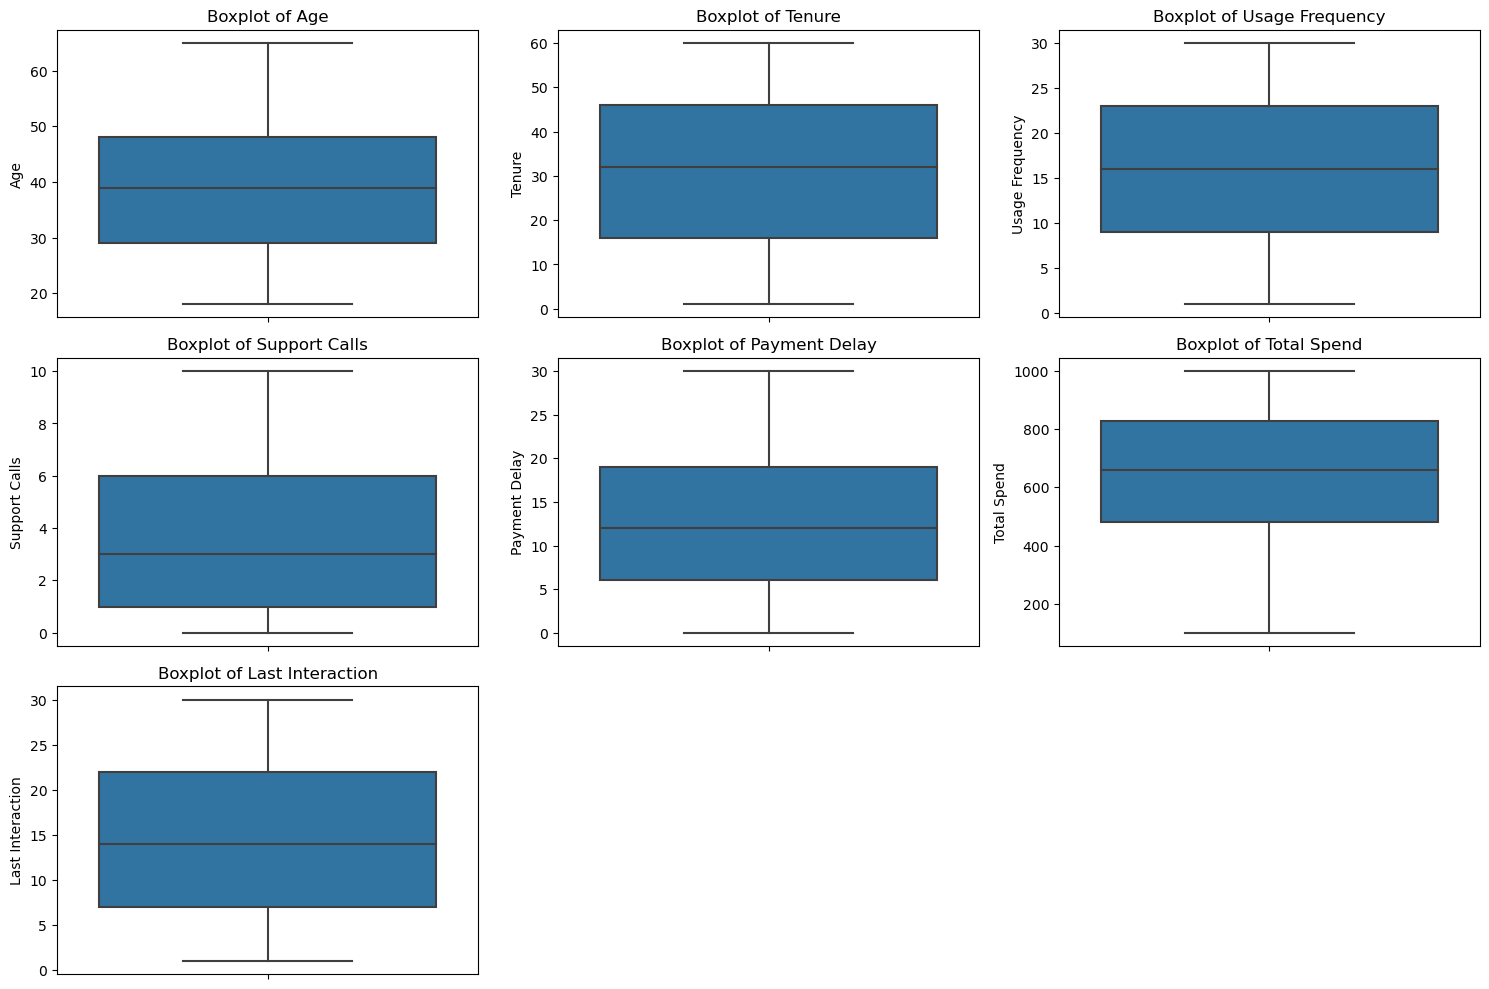

In [8]:
#détection et visualisation des valeurs aberrantes
# Liste des colonnes numériques
numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
#Création des boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=Customer_churn[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Les boîtes à moustaches montrent une répartition uniforme des âges et des durées de relation client sans valeurs aberrantes significatives. Les fréquences d'utilisation, les appels au support, les délais de paiement et les dépenses totales présentent des outliers notables. Ces valeurs aberrantes indiquent que certains clients se comportent de manière exceptionnellement différente par rapport à la moyenne. Les dernières interactions des clients sont également bien réparties sans outliers.

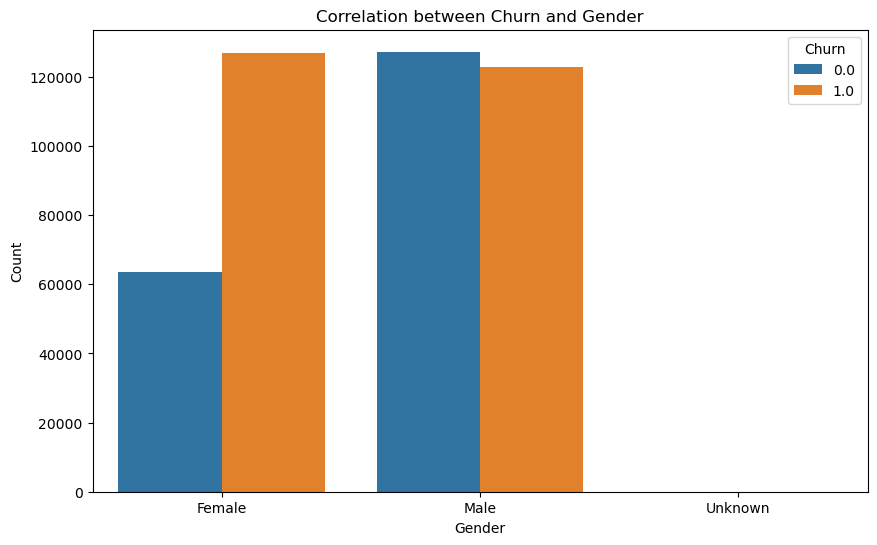

In [9]:
# Création d'un graphique montrant la corrélation entre Churn et Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Churn', data=Customer_churn)
plt.title('Correlation between Churn and Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

D'aprés l'histogramme genré, les femmes ont plus tendance à churner que les hommes, donc on va garder la variable gender comme variable explicative par la suite pour nos modèles de ML. 

In [10]:
# Test du Khi-2 pour la relation entre 'Age' et 'Churn'
import scipy.stats as stats
contingency_table = pd.crosstab(Customer_churn['Gender'], Customer_churn['Churn'])
chi2_result = stats.chi2_contingency(contingency_table)
print("Chi2 result:")
print ("chi2 statistic:",chi2_result [0])
print ("p-value:",chi2_result[1])
print ("Degree of freedom:",chi2_result[2])

Chi2 result:
chi2 statistic: 13562.219873856144
p-value: 0.0
Degree of freedom: 2


Le test du chi-2 pour la relation entre l'âge et le churn a donné un chi-2 statistique de 8236.8836 et une valeur p de 0.0. Cela indique une relation significative entre l'âge et le churn, puisque la p-valeur est bien en dessous du seuil typique de 0.05. Les fréquences observées et attendues montrent des différences notables, confirmant l'hypothèse d'une association entre ces deux variables.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Séparation des features et de la target
X = Customer_churn[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender', 'Subscription Type', 'Contract Length']]
y = Customer_churn['Churn']

# Séparation des colonnes numériques et catégorielles
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

# Préprocessing pour les colonnes numériques et catégorielles
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Création du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle 1: Régression Logistique
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Entraînement et évaluation de la régression logistique
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 0.8964805426066442
Confusion Matrix:
 [[34610  3533]
 [ 5594 44430]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     38143
         1.0       0.93      0.89      0.91     50024

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167



Le modèle de régression logistique présente une précision de 0.89, indiquant une bonne performance globale. Pour la classe "1" (churn), les scores de précision, rappel et F1 sont de 0.82, 0.83 et 0.83 respectivement, montrant une capacité efficace à identifier les churners. La matrice de confusion révèle 712 faux négatifs et 80 faux positifs. Les mesures de classification démontrent que le modèle est utile pour les stratégies de rétention des clients.

In [12]:
# Séparation des features et de la target
X = Customer_churn[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender', 'Subscription Type', 'Contract Length']]
y = Customer_churn['Churn']

# Séparation des colonnes numériques et catégorielles
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']


# Création du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Modèle 2: Random Forest, definition du pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Entrainement du modéle RandomForest:
pipeline.fit(X_train, y_train)

#Prédiction:
y_pred_rf = pipeline.predict (X_test)


# Evaluation du modele 
def evaluate_model (y_test, y_pred, model_name):
    accuracy = accuracy_score (y_test, y_pred)
    precision = precision_score (y_test, y_pred)
    recall = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    roc_auc = roc_auc_score (y_test, y_pred)



    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy:{accuracy:.4f}")
    print(f"Precision:{precision:.4f}")
    print(f"Recall:{recall:.4f}")
    print(f"F1 Score:{f1:.4f}")
    print(f"ROC AUC:{roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")    
    print(classification_report(y_test, y_pred))
    print("\n")
      
evaluate_model (y_test,y_pred_rf,"Random Forest")



Random Forest Model Evaluation:
Accuracy:0.9994
Precision:1.0000
Recall:0.9989
F1 Score:0.9994
ROC AUC:0.9994
Confusion Matrix:
[[38142     1]
 [   56 49968]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167





In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define the preprocessing for numeric and categorical features
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Load your data here
# X, y = your_data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model with cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {scores.std():.4f}')

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred, average='macro')

    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")

Cross-Validation Accuracy Scores: [0.99945558 0.99939887 0.99961437 0.9991947  0.99937618]
Mean Cross-Validation Accuracy: 0.9994
Standard Deviation of Cross-Validation Accuracy: 0.0001
Random Forest Model Evaluation:
Accuracy: 0.9994
Precision: 0.9993
Recall: 0.9994
F1 Score: 0.9993
ROC AUC: 0.9994
[[38142     1]
 [   56 49968]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167





In [14]:
print("Customer len:",(len(Customer_churn)))
print("Pred:",(len(y_pred_rf)))
print ("X Train:",(len(X_train)))
print ("X Test:",(len(X_test)))
print ("y Train:",(len(y_train)))
print("y Test:", (len(y_test)))

Customer len: 440833
Pred: 88167
X Train: 352666
X Test: 88167
y Train: 352666
y Test: 88167


In [15]:
# Create a DataFrame with predictions and correct index alignment
predictions_df = pd.DataFrame({'Predicted_Churn': y_pred_rf}, index=X_test.index)

In [16]:
# Merge predictions back into the original dataframe
Customer_churn_with_predictions = pd.concat([X_test, predictions_df], axis=1)

In [17]:
print(Customer_churn_with_predictions.head())

         Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
69437   27.0    14.0             28.0            3.0           16.0   
224323  40.0    19.0              2.0            8.0           28.0   
22398   27.0    57.0              3.0            0.0           24.0   
283708  40.0    21.0             14.0            0.0           11.0   
167619  39.0    58.0              4.0            2.0            8.0   

        Total Spend  Last Interaction  Gender Subscription Type  \
69437        862.00               9.0    Male          Standard   
224323       620.81              21.0    Male          Standard   
22398        915.00              26.0  Female          Standard   
283708       592.83               9.0    Male             Basic   
167619       694.00              15.0    Male          Standard   

       Contract Length  Predicted_Churn  
69437          Monthly              1.0  
224323         Monthly              1.0  
22398           Annual              1.0  
28

In [18]:
#Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=numeric_features + categorical_features)

# Create a DataFrame for predictions
predictions = pd.DataFrame(y_pred_rf, columns=['Churn_Prediction'])

# Reset index of X_test and y_test
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = pd.Series(y_test).reset_index(drop=True)

# Concatenate X_test with the predictions
results = pd.concat([X_test_reset, predictions, y_test_reset], axis=1)
results.columns = list(X_test.columns) + ['Churn_Prediction', 'Actual_Churn']

# Display the combined DataFrame
print(results.head())

    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0  27.0    14.0             28.0            3.0           16.0       862.00   
1  40.0    19.0              2.0            8.0           28.0       620.81   
2  27.0    57.0              3.0            0.0           24.0       915.00   
3  40.0    21.0             14.0            0.0           11.0       592.83   
4  39.0    58.0              4.0            2.0            8.0       694.00   

   Last Interaction  Gender Subscription Type Contract Length  \
0               9.0    Male          Standard         Monthly   
1              21.0    Male          Standard         Monthly   
2              26.0  Female          Standard          Annual   
3               9.0    Male             Basic          Annual   
4              15.0    Male          Standard         Monthly   

   Churn_Prediction  Actual_Churn  
0               1.0           1.0  
1               1.0           1.0  
2               1.0       

In [26]:
 #Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=numeric_features + categorical_features)

# Create a DataFrame for predictions
predictions = pd.DataFrame(y_pred_rf, columns=['Churn_Prediction'])

# Reset index of X_test and y_test
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = pd.Series(y_test).reset_index(drop=True)

# Concatenate X_test with the predictions
results = pd.concat([X_test_reset, predictions, y_test_reset], axis=1)
results.columns = list(X_test.columns) + ['Churn_Prediction', 'Actual_Churn']

# Display the combined DataFrame
print(results.head())

    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0  27.0    14.0             28.0            3.0           16.0       862.00   
1  40.0    19.0              2.0            8.0           28.0       620.81   
2  27.0    57.0              3.0            0.0           24.0       915.00   
3  40.0    21.0             14.0            0.0           11.0       592.83   
4  39.0    58.0              4.0            2.0            8.0       694.00   

   Last Interaction  Gender Subscription Type Contract Length  \
0               9.0    Male          Standard         Monthly   
1              21.0    Male          Standard         Monthly   
2              26.0  Female          Standard          Annual   
3               9.0    Male             Basic          Annual   
4              15.0    Male          Standard         Monthly   

   Churn_Prediction  Actual_Churn  
0               1.0           1.0  
1               1.0           1.0  
2               1.0       

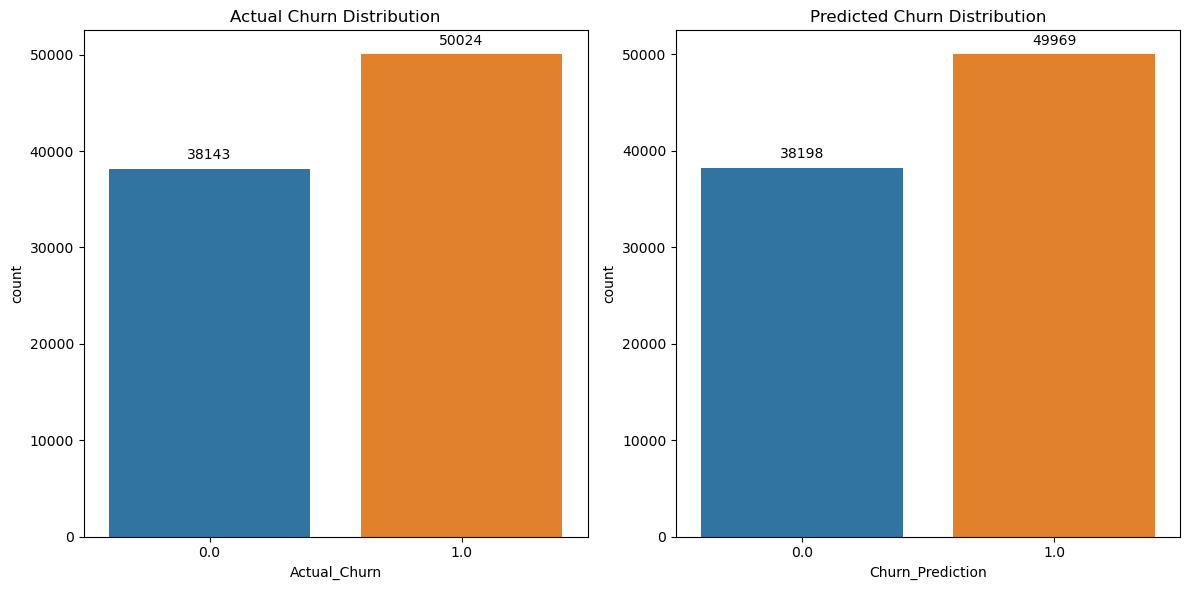

In [27]:
# Initialize the figure
plt.figure(figsize=(12, 6))

# Actual Churn Distribution
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=results, x='Actual_Churn')
plt.title('Actual Churn Distribution')
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Predicted Churn Distribution
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=results, x='Churn_Prediction')
plt.title('Predicted Churn Distribution')
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [28]:
# Assuming 'y_pred' is available directly from the model
# If you have a specific adjustment, apply it here. For example:
# threshold = 0.5
# y_pred_adjusted = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# For simplicity, let's assume y_pred is your final predictions if no adjustment is needed
y_pred_adjusted = y_pred_rf

# Convert to pandas Series with the correct index if not already done
y_test_series = pd.Series(y_test, index=X_test.index)
y_pred_series = pd.Series(y_pred_adjusted, index=X_test.index)

# Identify false positives and false negatives
false_positives = X_test[(y_test_series == 0) & (y_pred_series == 1)]
false_negatives = X_test[(y_test_series == 1) & (y_pred_series == 0)]

# Display some examples of false positives and false negatives
print("False Positives:")
print(false_positives.head())  # Display the first few false positive examples

print("\nFalse Negatives:")
print(false_negatives.head())  # Display the first few false negative examples

# Analyze their distribution by printing the number of false positives and false negatives
print(f"Number of False Positives: {len(false_positives)}")
print(f"Number of False Negatives: {len(false_negatives)}")

False Positives:
         Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
186664  50.0    49.0              1.0            3.0            1.0   

        Total Spend  Last Interaction Gender Subscription Type Contract Length  
186664        500.0              22.0   Male          Standard       Quarterly  

False Negatives:
         Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
78311   42.0    12.0              4.0            1.0            1.0   
183826  19.0    59.0              2.0            2.0            5.0   
136465  18.0     2.0             14.0            2.0           18.0   
47330   45.0    12.0              5.0            4.0           11.0   
33010   18.0    27.0              8.0            2.0           10.0   

        Total Spend  Last Interaction  Gender Subscription Type  \
78311         976.0              20.0    Male             Basic   
183826        695.0              10.0    Male           Premium   
136465        950.0             